# EDA

## 데이터 준비
- [kaggle api accept / kaggle.json down](https://stackoverflow.com/questions/49310470/using-kaggle-datasets-into-google-colab)
- key from https://www.kaggle.com/{name}/account

In [0]:
f = open('kaggle.json', 'w')
f.write('{"username":"minwoooo","key":"e861bf4e2ce694990439a4c0ea07f954"}')
f.close()

In [2]:
!pip install -q kaggle
!pip install plotly
!pip install mpl_finance

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

  Running setup.py bdist_wheel for mpl-finance ... - done
  Stored in directory: /content/.cache/pip/wheels/67/db/24/04ddd06ec9a5e4500b44c13d8e95898f5b90b512303e385de8
Successfully built mpl-finance


In [3]:
import os 

if not os.path.isdir('/content/.kaggle/datasets/jessevent/all-crypto-currencies'):
    print("file empty. download start")
    !kaggle datasets download -d jessevent/all-crypto-currencies
else :
    print("file already downloads. file list : ")
    !ls /content/.kaggle/datasets/jessevent/all-crypto-currencies

file empty. download start
 50%|██████████████████▉                   | 9.00M/18.0M [00:00<00:00, 63.5MB/s]
100%|██████████████████████████████████████| 18.0M/18.0M [00:00<00:00, 96.4MB/s]


In [0]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 

import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

In [5]:
crypto_markets = pd.read_csv('/content/.kaggle/datasets/jessevent/all-crypto-currencies/crypto-markets.csv')
crypto_markets['date'] = pd.to_datetime(crypto_markets['date'])

crypto_markets.tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
785019,aston,ATX,Aston,2018-05-20,1645,0.174143,0.174143,0.157184,0.167866,854900.0,0.0,0.6299,0.02
785020,aston,ATX,Aston,2018-05-21,1645,0.168075,0.169099,0.165706,0.166054,845673.0,0.0,0.1026,0.00
785021,aston,ATX,Aston,2018-05-22,1645,0.156766,0.157625,0.142146,0.150380,486511.0,0.0,0.5319,0.02
785022,aston,ATX,Aston,2018-05-23,1645,0.147663,0.169331,0.131630,0.138031,1411730.0,0.0,0.1698,0.04
785023,aston,ATX,Aston,2018-05-24,1645,0.142871,0.157774,0.139641,0.148132,821824.0,0.0,0.4683,0.02


In [6]:
crypto_markets.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,785024.000000,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05
mean,842.650876,3.550859e+02,4.233219e+02,2.980848e+02,3.536499e+02,7.459260e+06,1.563100e+08,-inf,1.252368e+02
std,452.624872,1.403939e+04,1.733459e+04,1.157055e+04,1.396510e+04,1.817992e+08,3.478147e+09,NaN,7.379191e+03
min,1.000000,2.500000e-09,3.200000e-09,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000e+00
25%,472.000000,1.117000e-03,1.305000e-03,9.630000e-04,1.119000e-03,6.400000e+01,1.294600e+04,1.552000e-01,0.000000e+00
50%,910.000000,1.723150e-02,1.980350e-02,1.511100e-02,1.723000e-02,1.201000e+03,1.932045e+05,4.342000e-01,0.000000e+00
75%,1185.000000,2.159187e-01,2.424478e-01,1.915900e-01,2.156592e-01,3.963225e+04,3.635550e+06,7.586000e-01,4.000000e-02
max,1645.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261410e+11,1.000000e+00,1.770563e+06


In [7]:
df = crypto_markets.copy()
df['date'] = pd.to_datetime(df['date'])

df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


## 상황 파악 
- 코인은 몇 개나 있는지
- 각 코인의 사이즈는 어느만큼 되는지 알아보겠습니다.

In [8]:
count = len(df['name'].unique())
print('We have {} coins'.format(count))

We have 1643 coins


### 너무 많아요.
- 잘라서 보겠습니다.

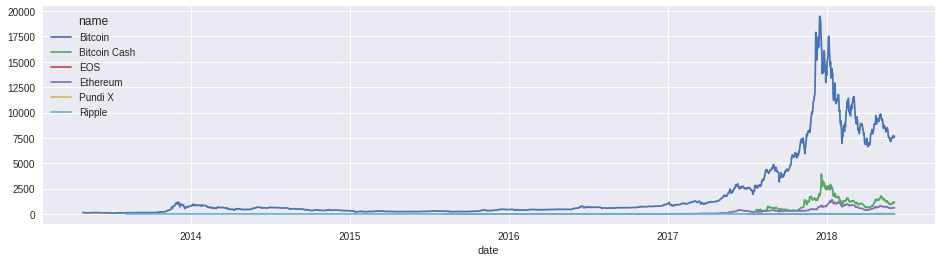

In [12]:
df = crypto_markets.copy()

names = df.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index.tolist()
names.append('Pundi X')
df = df[df['name'].isin(names)]

df.groupby(['date', 'name'])['close'].mean().unstack().plot(figsize=(16,4))

### 망했습니다. 
- 2018년을 시작으로 폭망하고 있는 모습을 확인했습니다. 
- 좀 더 가까이 망하는 모습을 보도록 하겠습니다. 

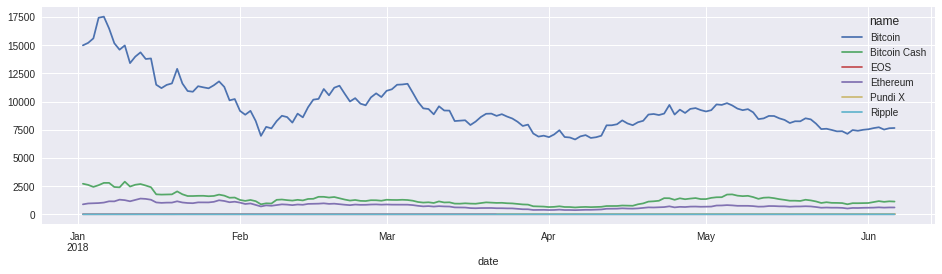

In [13]:
recent = df[(df['date'] > '2018-01-01')].copy()
recent.groupby(['date', 'name'])['close'].mean().unstack().plot(figsize=(16,4));

## 좀 더 자세히
- 봉 차트로 살펴봅니다.
- 이동 평균도 보겠습니다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


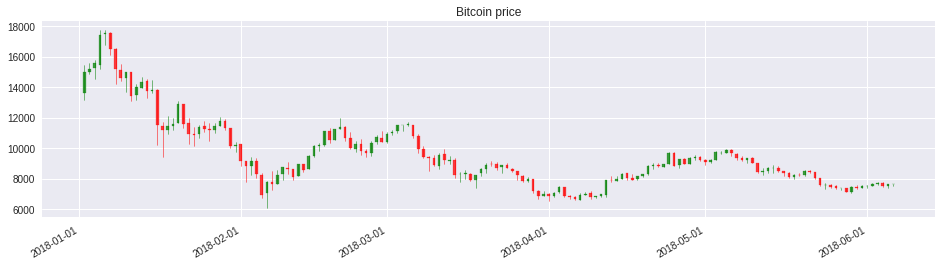

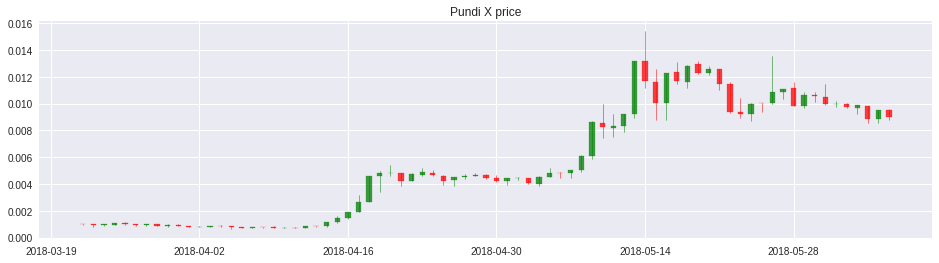

In [15]:
target = 'BTC'
months = 3

name = df[df['symbol'] == target].iloc[-1]['name']
filtered_df = recent[(df['symbol'] == target)].copy()
OHLCfiltered_df = filtered_df[['date','open','high','low','close']].copy()
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

f,ax=plt.subplots(figsize=(16,4))
ax.xaxis_date()
candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.show()

target = 'NPXS'

name = df[df['symbol'] == target].iloc[-1]['name']
filtered_df = recent[(recent['symbol'] == target)].copy()
OHLCfiltered_df = filtered_df[['date','open','high','low','close']].copy()
OHLCfiltered_df['date'] = mdates.date2num(OHLCfiltered_df['date'].dt.date)

f,ax=plt.subplots(figsize=(16,4))
ax.xaxis_date()
candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)

plt.title(name + " price")
plt.show()

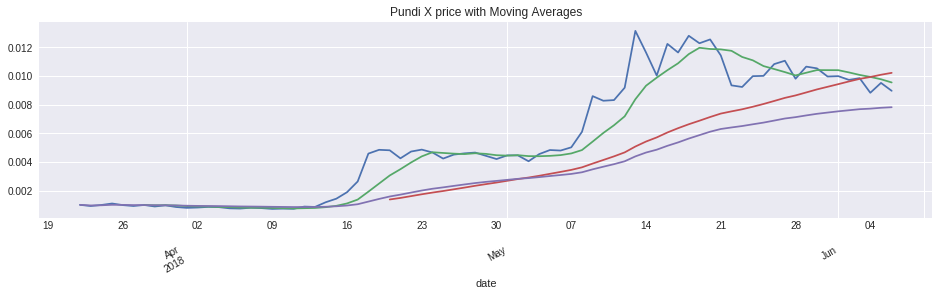

In [17]:
# Moving average chart for Rank 1 currency (6 months)
target = 'NPXS'
months = 6

name = df[df['symbol'] == target].iloc[-1]['name']
filtered_df = recent[(recent['symbol'] == target)].copy()

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(16,4))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(7).mean().plot(label='20D MA', ax=ax)
filtered_df.close.rolling(30).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.gcf().autofmt_xdate()
plt.show()